In [2]:
from pull_markit import load_markit_data, load_multiple_data, load_sector_data
from pull_cds_return_data import load_real_cds_return
from pull_rf_data import load_fed_yield_curve, load_fred_data

from calc_cds_daily_return import load_cds_return
from create_portfolio import load_portfolio

In [3]:
import datetime

In [61]:
# Load data using the imported functions
markit_data = load_multiple_data()
sector_data = load_sector_data()
real_cds_return = load_real_cds_return()
cds_return = load_cds_return()
portfolio = load_portfolio()
fed_yield_curve = load_fed_yield_curve()
fred_data = load_fred_data()

In [62]:
from create_portfolio import pivot_table

In [63]:
from misc_tools import month_code_to_date


In [64]:
import matplotlib.pyplot as plt
def plot_cds_comparison(df_actual, df_replication, column_name):
    """
    Plots the comparison of actual vs. replicated values for a given CDS column.

    Parameters:
    df_actual (DataFrame): DataFrame containing actual CDS values.
    df_replication (DataFrame): DataFrame containing replicated CDS values.
    column_name (str): The column name (CDS series) to plot.
    """
    if column_name not in df_actual.columns or column_name not in df_replication.columns:
        print(f"Column {column_name} not found in DataFrames.")
        return
    
    plt.figure(figsize=(10, 5))
    plt.plot(df_actual.index, df_actual[column_name], label="Actual", linestyle='-', marker='o')
    plt.plot(df_replication.index, df_replication[column_name], label="Replication", linestyle='--', marker='x')
    
    plt.title(f"Comparison of {column_name}: Actual vs. Replication")
    plt.xlabel("Time (yyyymm)")
    plt.ylabel("CDS Spread")
    plt.legend()
    plt.grid(True)
    plt.show()

In [65]:
portfolio.head(3)

,yyyymm,portfolio,daily_return
0,200101.0,1,-0.003000
1,200101.0,2,0.002679
2,200101.0,3,0.000035


In [66]:
portfolio["yyyymm"] = portfolio["yyyymm"].apply(month_code_to_date)

real_cds_return["yyyymm"] = real_cds_return["yyyymm"].apply(month_code_to_date)
real_cds_return.set_index("yyyymm", inplace=True)

In [67]:
import pandas as pd
real_cds_return.index = pd.to_datetime(real_cds_return.index)

In [68]:
def pivot_table(portfolio):
    df_pivot = portfolio.pivot(index='yyyymm', columns='portfolio', values='daily_return')
    df_pivot.columns = [f"CDS_{str(col).zfill(2)}" for col in df_pivot.columns]
    return df_pivot


In [69]:
pivot_table = pivot_table(portfolio)

In [70]:
pivot_table.index = pd.to_datetime(pivot_table.index)

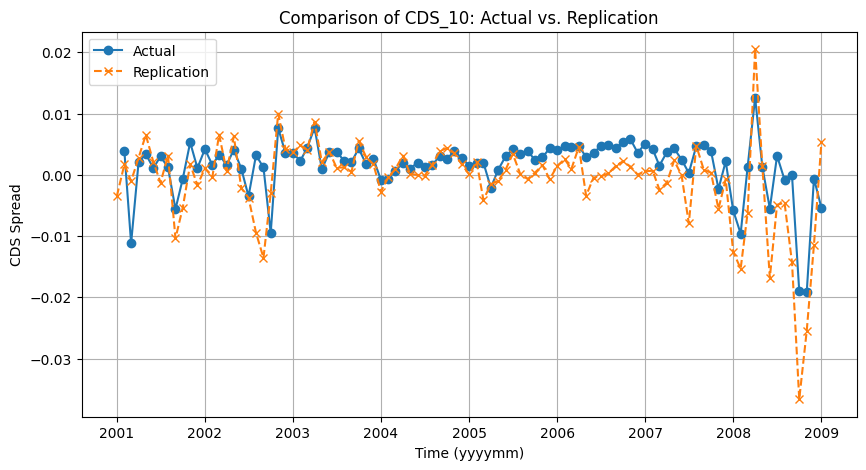

In [71]:
plot_cds_comparison(real_cds_return.loc[:"2009-01-01"],pivot_table.loc[:"2009-01-01"],"CDS_10")

In [72]:
portfolio[(portfolio["portfolio"] == 10) & (portfolio["yyyymm"] < datetime.date(2009, 1, 1))]["daily_return"].min()

-0.03662831412900342

In [73]:
portfolio[(portfolio["portfolio"] == 10) & (portfolio["daily_return"] < -0.03)]

,yyyymm,portfolio,daily_return
1869,2008-10-01,10,-0.036628


In [74]:
cds_return[(cds_return["trade_date"] == "2008-10-01")].sort_values(by="daily_return")

,ticker,trade_date,spread_prev,spread,RD,RD_prev,sector,daily_return
2889950,OMX,2008-10-01,0.014700,0.050903,4.045326,4.677870,Consumer Services,-0.169295
2967416,YRCWWI,2008-10-01,0.102503,0.144252,2.883534,3.332715,Industrials,-0.138724
2756559,BCFWC,2008-10-01,0.152902,0.191128,2.478990,2.801003,Consumer Services,-0.106460
2941400,TSG-Sab,2008-10-01,0.118660,0.145545,2.871065,3.147071,Consumer Services,-0.084134
2752990,AXL,2008-10-01,0.162740,0.191892,2.473134,2.712110,Consumer Goods,-0.078412
...,...,...,...,...,...,...,...,...
2911949,RHD,2008-10-01,0.238035,0.235156,2.173744,2.155434,Consumer Services,0.007157
2869460,MIKE,2008-10-01,0.136593,0.134015,2.985146,2.958345,Consumer Services,0.008173
2891260,OSG,2008-10-01,0.030418,0.027758,4.435653,4.386982,Industrials,0.011790
2868585,MGM,2008-10-01,0.095205,0.091834,3.465094,3.421856,Consumer Services,0.011917


In [47]:
markit_data["ticker"].value_counts()

ticker
DE-JohnDeCap    6311
WFC             6311
RTN             6311
MWD             6311
R               6311
                ... 
CAFUC              1
JARDCOR            1
AMT-Inc            1
SMT                1
ENQ                1
Name: count, Length: 2260, dtype: int64

In [44]:
from misc_tools import pull_from_wrds

In [77]:
sql = f"""
SELECT ticker, date, parspread
FROM markit.cds2008
WHERE ticker = 'OMX'
"""
pull_from_wrds(sql)

Loading library list...
Done


,ticker,date,parspread
0,OMX,2008-01-01,0.028682
1,OMX,2008-01-01,0.028682
2,OMX,2008-01-01,0.012498
3,OMX,2008-01-02,0.028682
4,OMX,2008-01-02,0.012498
...,...,...,...
20474,OMX,2008-12-31,0.041513
20475,OMX,2008-12-31,0.041513
20476,OMX,2008-12-31,0.040062
20477,OMX,2008-12-31,0.040062
